# Data Preprocessing Pipeline
## Mental Health Chatbot - Complete Data Engineering

---

This notebook presents a comprehensive data preprocessing pipeline for training an empathetic mental health chatbot.

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle, Rectangle
from matplotlib.lines import Line2D
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Style Configuration
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'figure.facecolor': 'white',
    'axes.facecolor': '#fafafa',
    'axes.edgecolor': '#333333'
})

# Color Palette
COLORS = {
    'primary': '#1976D2', 'secondary': '#7B1FA2', 
    'success': '#388E3C', 'warning': '#F57C00',
    'danger': '#D32F2F', 'info': '#0097A7'
}
print("Libraries loaded successfully!")

Libraries loaded successfully!


---
## 1. Data Preprocessing Pipeline Overview

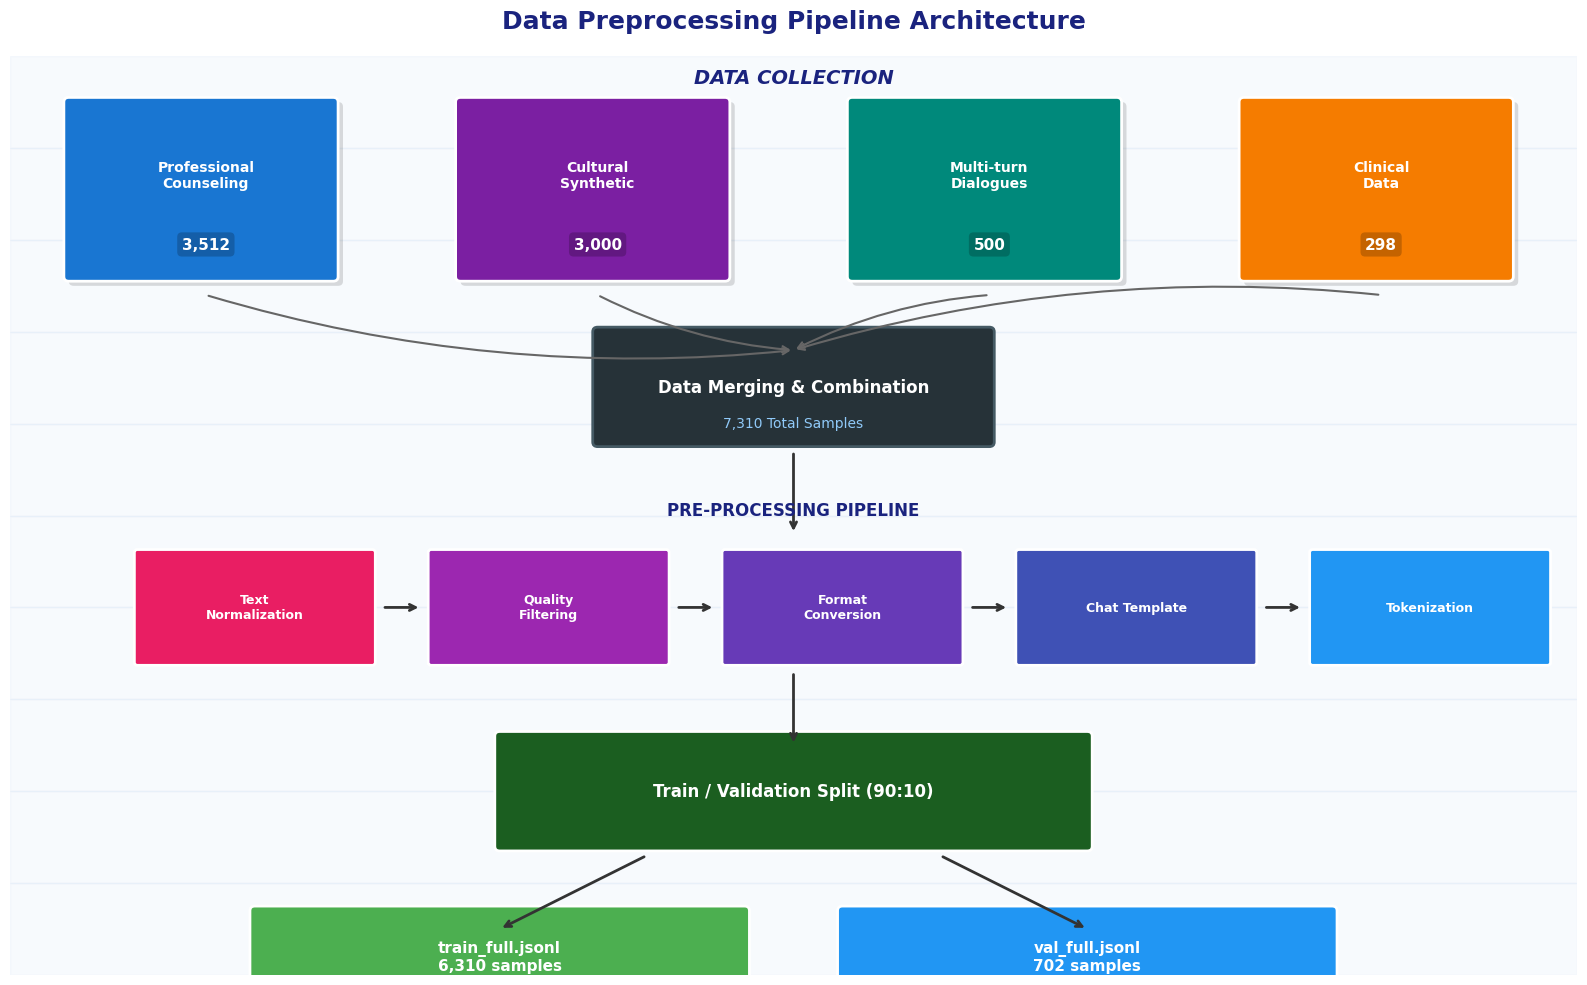

In [4]:
# PIPELINE ARCHITECTURE DIAGRAM
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.axis('off')
ax.set_title('Data Preprocessing Pipeline Architecture', fontsize=18, fontweight='bold', pad=20, color='#1a237e')

# Background
for i in range(10):
    ax.axhspan(i, i+1, alpha=0.03, color='#1976D2')

# Phase 1: Data Sources
sources = [
    (2, 8.5, 'Professional\nCounseling', '#1976D2', '3,512'),
    (6, 8.5, 'Cultural\nSynthetic', '#7B1FA2', '3,000'),
    (10, 8.5, 'Multi-turn\nDialogues', '#00897B', '500'),
    (14, 8.5, 'Clinical\nData', '#F57C00', '298')
]

for x, y, label, color, count in sources:
    shadow = FancyBboxPatch((x-1.35, y-0.95), 2.7, 1.9, boxstyle="round,pad=0.05", facecolor='#00000022', edgecolor='none')
    ax.add_patch(shadow)
    box = FancyBboxPatch((x-1.4, y-0.9), 2.7, 1.9, boxstyle="round,pad=0.05", facecolor=color, edgecolor='white', linewidth=2)
    ax.add_patch(box)
    ax.text(x, y+0.2, label, ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    ax.text(x, y-0.55, count, ha='center', va='center', fontsize=11, fontweight='bold', color='white', 
            bbox=dict(boxstyle='round', facecolor='#00000033', edgecolor='none'))

ax.text(8, 9.7, 'DATA COLLECTION', ha='center', fontsize=14, fontweight='bold', color='#1a237e', style='italic')

# Merge Arrows
for x in [2, 6, 10, 14]:
    ax.annotate('', xy=(8, 6.8), xytext=(x, 7.4), arrowprops=dict(arrowstyle='->', color='#666', lw=1.5, connectionstyle='arc3,rad=0.1'))

# Merge Box
merge_box = FancyBboxPatch((6, 5.8), 4, 1.2, boxstyle="round,pad=0.05", facecolor='#263238', edgecolor='#455A64', linewidth=2)
ax.add_patch(merge_box)
ax.text(8, 6.4, 'Data Merging & Combination', ha='center', va='center', fontsize=12, fontweight='bold', color='white')
ax.text(8, 6, '7,310 Total Samples', ha='center', va='center', fontsize=10, color='#90CAF9')

# Preprocessing Steps
ax.annotate('', xy=(8, 4.8), xytext=(8, 5.7), arrowprops=dict(arrowstyle='->', color='#333', lw=2))

steps = [
    (2.5, 4, 'Text\nNormalization', '#E91E63'),
    (5.5, 4, 'Quality\nFiltering', '#9C27B0'),
    (8.5, 4, 'Format\nConversion', '#673AB7'),
    (11.5, 4, 'Chat Template', '#3F51B5'),
    (14.5, 4, 'Tokenization', '#2196F3')
]

ax.text(8, 5, 'PRE-PROCESSING PIPELINE', ha='center', fontsize=12, fontweight='bold', color='#1a237e')

for i, (x, y, label, color) in enumerate(steps):
    box = FancyBboxPatch((x-1.2, y-0.6), 2.4, 1.2, boxstyle="round,pad=0.03", facecolor=color, edgecolor='white', linewidth=2)
    ax.add_patch(box)
    ax.text(x, y, label, ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    if i < len(steps) - 1:
        ax.annotate('', xy=(steps[i+1][0]-1.3, y), xytext=(x+1.3, y), arrowprops=dict(arrowstyle='->', color='#333', lw=2))

# Split
ax.annotate('', xy=(8, 2.5), xytext=(8, 3.3), arrowprops=dict(arrowstyle='->', color='#333', lw=2))
split_box = FancyBboxPatch((5, 1.4), 6, 1.2, boxstyle="round,pad=0.05", facecolor='#1B5E20', edgecolor='white', linewidth=2)
ax.add_patch(split_box)
ax.text(8, 2, 'Train / Validation Split (90:10)', ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Output
ax.annotate('', xy=(5, 0.5), xytext=(6.5, 1.3), arrowprops=dict(arrowstyle='->', color='#333', lw=2))
ax.annotate('', xy=(11, 0.5), xytext=(9.5, 1.3), arrowprops=dict(arrowstyle='->', color='#333', lw=2))

train_box = FancyBboxPatch((2.5, -0.3), 5, 1, boxstyle="round,pad=0.05", facecolor='#4CAF50', edgecolor='white', linewidth=2)
ax.add_patch(train_box)
ax.text(5, 0.2, 'train_full.jsonl\n6,310 samples', ha='center', va='center', fontsize=11, fontweight='bold', color='white')

val_box = FancyBboxPatch((8.5, -0.3), 5, 1, boxstyle="round,pad=0.05", facecolor='#2196F3', edgecolor='white', linewidth=2)
ax.add_patch(val_box)
ax.text(11, 0.2, 'val_full.jsonl\n702 samples', ha='center', va='center', fontsize=11, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('outputs/data_preprocessing_pipeline.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

---
## 2. Data Source Analysis

In [5]:
# Load data
train_data = []
with open('data/train_full.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        train_data.append(json.loads(line))

val_data = []
with open('data/val_full.jsonl', 'r', encoding='utf-8') as f:
    for line in f:
        val_data.append(json.loads(line))

print(f"Training: {len(train_data):,} | Validation: {len(val_data):,} | Total: {len(train_data)+len(val_data):,}")

Training: 6,310 | Validation: 702 | Total: 7,012


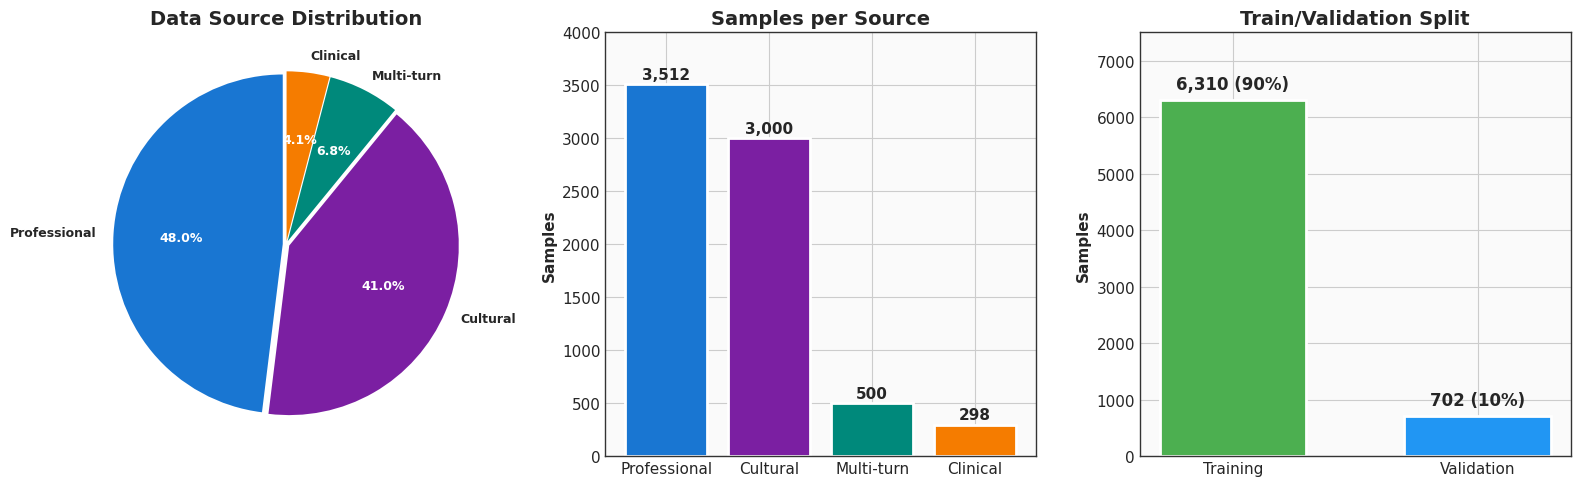

In [6]:
# DATA SOURCE VISUALIZATION
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pie Chart
ax1 = axes[0]
sources = ['Professional', 'Cultural', 'Multi-turn', 'Clinical']
sizes = [3512, 3000, 500, 298]
colors = ['#1976D2', '#7B1FA2', '#00897B', '#F57C00']
wedges, texts, autotexts = ax1.pie(sizes, labels=sources, colors=colors, explode=(0.02,)*4,
                                   autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9, 'fontweight': 'bold'})
for a in autotexts: a.set_color('white')
ax1.set_title('Data Source Distribution', fontsize=14, fontweight='bold')

# Bar Chart
ax2 = axes[1]
bars = ax2.bar(sources, sizes, color=colors, edgecolor='white', linewidth=2)
ax2.set_ylabel('Samples', fontweight='bold')
ax2.set_title('Samples per Source', fontsize=14, fontweight='bold')
for bar, s in zip(bars, sizes): ax2.text(bar.get_x()+bar.get_width()/2, bar.get_height()+50, f'{s:,}', ha='center', fontweight='bold')
ax2.set_ylim(0, 4000)

# Train/Val
ax3 = axes[2]
bars = ax3.bar(['Training', 'Validation'], [6310, 702], color=['#4CAF50', '#2196F3'], edgecolor='white', linewidth=2, width=0.6)
ax3.set_ylabel('Samples', fontweight='bold')
ax3.set_title('Train/Validation Split', fontsize=14, fontweight='bold')
ax3.text(0, 6500, '6,310 (90%)', ha='center', fontweight='bold', fontsize=12)
ax3.text(1, 900, '702 (10%)', ha='center', fontweight='bold', fontsize=12)
ax3.set_ylim(0, 7500)

plt.tight_layout()
plt.savefig('outputs/data_source_analysis.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

---
## 3. Conversation Statistics

In [7]:
# Analyze conversations
def analyze(data):
    return {
        'turns': [len(d['messages']) for d in data],
        'chars': [sum(len(m['content']) for m in d['messages']) for d in data],
        'avg_len': [sum(len(m['content']) for m in d['messages'])/len(d['messages']) for d in data]
    }

train_stats = analyze(train_data)
print(f"Avg turns: {np.mean(train_stats['turns']):.2f} | Avg chars: {np.mean(train_stats['chars']):.0f} | Avg msg len: {np.mean(train_stats['avg_len']):.0f}")

Avg turns: 3.51 | Avg chars: 1277 | Avg msg len: 475


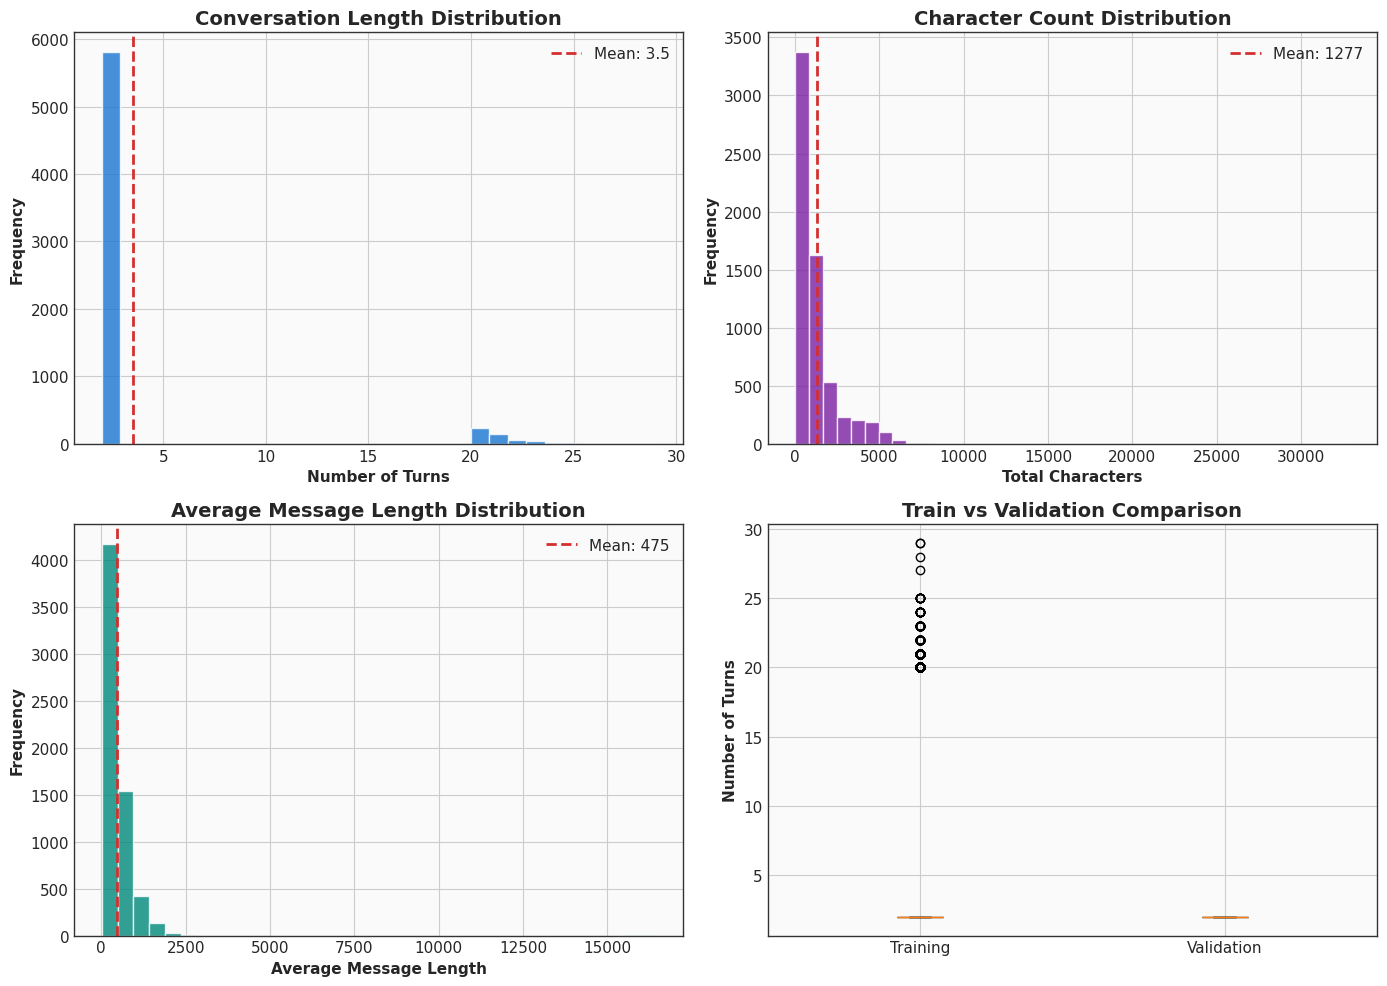

In [8]:
# STATISTICS VISUALIZATION
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Turns Distribution
ax1 = axes[0, 0]
ax1.hist(train_stats['turns'], bins=30, color='#1976D2', edgecolor='white', alpha=0.8)
ax1.axvline(np.mean(train_stats['turns']), color='#D32F2F', linestyle='--', lw=2, label=f'Mean: {np.mean(train_stats["turns"]):.1f}')
ax1.set_xlabel('Number of Turns')
ax1.set_ylabel('Frequency')
ax1.set_title('Conversation Length Distribution', fontsize=14, fontweight='bold')
ax1.legend()

# Characters Distribution
ax2 = axes[0, 1]
ax2.hist(train_stats['chars'], bins=40, color='#7B1FA2', edgecolor='white', alpha=0.8)
ax2.axvline(np.mean(train_stats['chars']), color='#D32F2F', linestyle='--', lw=2, label=f'Mean: {np.mean(train_stats["chars"]):.0f}')
ax2.set_xlabel('Total Characters')
ax2.set_ylabel('Frequency')
ax2.set_title('Character Count Distribution', fontsize=14, fontweight='bold')
ax2.legend()

# Avg Message Length
ax3 = axes[1, 0]
ax3.hist(train_stats['avg_len'], bins=35, color='#00897B', edgecolor='white', alpha=0.8)
ax3.axvline(np.mean(train_stats['avg_len']), color='#D32F2F', linestyle='--', lw=2, label=f'Mean: {np.mean(train_stats["avg_len"]):.0f}')
ax3.set_xlabel('Average Message Length')
ax3.set_ylabel('Frequency') 
ax3.set_title('Average Message Length Distribution', fontsize=14, fontweight='bold')
ax3.legend()

# Box Plot Comparison
ax4 = axes[1, 1]
val_stats = analyze(val_data)
bp = ax4.boxplot([train_stats['turns'], val_stats['turns']], labels=['Training', 'Validation'], patch_artist=True)
bp['boxes'][0].set_facecolor('#4CAF50')
bp['boxes'][1].set_facecolor('#2196F3')
ax4.set_ylabel('Number of Turns')
ax4.set_title('Train vs Validation Comparison', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/conversation_statistics.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

---
## 4. Quality Score Analysis

In [9]:
def quality_score(msgs):
    if not msgs: return 0
    n = len(msgs)
    avg = sum(len(m['content']) for m in msgs) / n
    turn_s = min(n/20, 1) * 40
    len_s = 40 if 100<=avg<=500 else (20 if 50<=avg<=800 else 10)
    u = sum(1 for m in msgs if m['role']=='user')
    a = sum(1 for m in msgs if m['role']=='assistant')
    bal_s = 20 if abs(u-a)<=1 else 10
    return turn_s + len_s + bal_s

scores = [quality_score(d['messages']) for d in train_data]
print(f"Quality - Mean: {np.mean(scores):.1f} | Median: {np.median(scores):.1f} | High(>70): {sum(1 for s in scores if s>70):,}")

Quality - Mean: 58.7 | Median: 64.0 | High(>70): 500


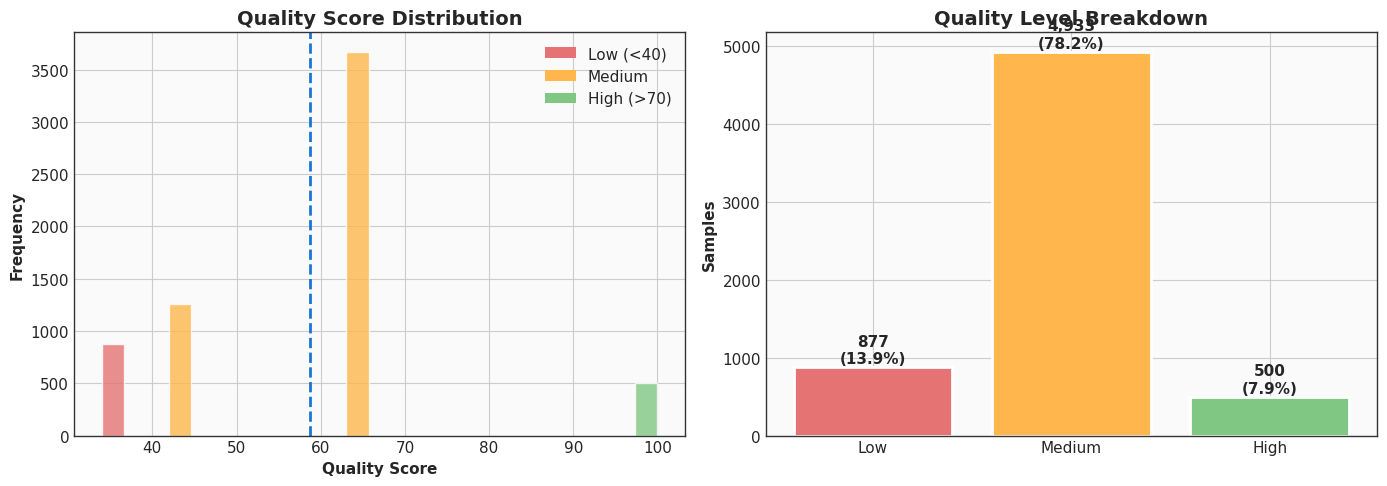

In [10]:
# QUALITY VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
n, bins, patches = ax1.hist(scores, bins=25, edgecolor='white', alpha=0.8)
for i, p in enumerate(patches):
    p.set_facecolor('#E57373' if bins[i]<40 else ('#FFB74D' if bins[i]<70 else '#81C784'))
ax1.axvline(np.mean(scores), color='#1976D2', linestyle='--', lw=2, label=f'Mean: {np.mean(scores):.1f}')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Quality Score Distribution', fontsize=14, fontweight='bold')
ax1.legend(handles=[mpatches.Patch(fc='#E57373', label='Low (<40)'), mpatches.Patch(fc='#FFB74D', label='Medium'), mpatches.Patch(fc='#81C784', label='High (>70)')])

ax2 = axes[1]
counts = [sum(1 for s in scores if s<40), sum(1 for s in scores if 40<=s<70), sum(1 for s in scores if s>=70)]
bars = ax2.bar(['Low', 'Medium', 'High'], counts, color=['#E57373', '#FFB74D', '#81C784'], edgecolor='white', lw=2)
for b, c in zip(bars, counts): ax2.text(b.get_x()+b.get_width()/2, b.get_height()+50, f'{c:,}\n({c/len(scores)*100:.1f}%)', ha='center', fontweight='bold')
ax2.set_ylabel('Samples')
ax2.set_title('Quality Level Breakdown', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/quality_analysis.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

---
## 5. Summary

In [ ]:
print("="*60)
print("DATA PREPROCESSING SUMMARY")
print("="*60)
print("\nDATA SOURCES:")
print(f"  Professional Counseling:  3,512 (48.0%)")
print(f"  Cultural Synthetic:       3,000 (41.0%)")
print(f"  Multi-turn Dialogues:       500 (6.8%)")
print(f"  Clinical Data:              298 (4.1%)")
print(f"  TOTAL:                    7,310 samples")
print("\nOUTPUT:")
print(f"  Training:    6,310 samples (90%)")
print(f"  Validation:    702 samples (10%)")
print("\nSTATISTICS:")
print(f"  Avg turns:     {np.mean(train_stats['turns']):.2f}")
print(f"  Avg chars:     {np.mean(train_stats['chars']):.0f}")
print(f"  Quality mean:  {np.mean(scores):.1f}/100")
print("="*60)

DATA PREPROCESSING SUMMARY

DATA SOURCES:
  Professional Counseling:  3,512 (48.0%)
  Cultural Synthetic:       3,000 (41.0%)
  Multi-turn Dialogues:       500 (6.8%)
  Clinical Data:              298 (4.1%)
  TOTAL:                    7,310 samples

OUTPUT:
  Training:    6,310 samples (90%)
  Validation:    702 samples (10%)

STATISTICS:
  Avg turns:     3.51
  Avg chars:     1277
  Quality mean:  58.7/100


: 